In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv")
#The dataset is already clean

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  888 non-null    int64  
 1   Embarked_C  888 non-null    float64
 2   Embarked_Q  888 non-null    float64
 3   Embarked_S  888 non-null    float64
 4   Female      888 non-null    float64
 5   Male        888 non-null    float64
 6   Survived    888 non-null    float64
 7   Pclass      888 non-null    float64
 8   Age         888 non-null    float64
 9   SibSp       888 non-null    float64
 10  Parch       888 non-null    float64
 11  Fare        888 non-null    float64
 12  fam_mbrs    888 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 90.3 KB


In [19]:
df.sample(10)

,Unnamed: 0,Embarked_C,Embarked_Q,Embarked_S,Female,Male,Survived,Pclass,Age,SibSp,Parch,Fare,fam_mbrs
8,8,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.334004,0.0,2.0,0.042332,2.0
32,32,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.346569,0.0,0.0,0.029468,0.0
747,747,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.044986,1.0,1.0,0.087452,2.0
547,547,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.409399,1.0,1.0,0.078042,2.0
170,170,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.761247,0.0,0.0,0.127376,0.0
664,664,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.396833,2.0,0.0,0.279468,2.0
70,70,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.396833,0.0,0.0,0.039924,0.0
53,53,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.359135,1.0,0.0,0.098859,1.0
392,392,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.283740,1.0,0.0,0.430703,1.0
836,836,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.346569,0.0,0.0,0.112928,0.0


In [22]:
df.describe()

,Unnamed: 0,Embarked_C,Embarked_Q,Embarked_S,Female,Male,Survived,Pclass,Age,SibSp,Parch,Fare,fam_mbrs
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,443.500000,0.185811,0.086712,0.727477,0.352477,0.647523,0.381757,2.313063,0.363426,0.524775,0.381757,0.116282,0.906532
std,256.487816,0.389173,0.281571,0.445508,0.478011,0.478011,0.486091,0.834007,0.163823,1.104186,0.806949,0.156564,1.615609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.271174,0.000000,0.000000,0.030022,0.000000
50%,443.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.346569,0.000000,0.000000,0.054959,0.000000
75%,665.250000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.434531,1.000000,0.000000,0.117003,1.000000
max,887.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,10.000000


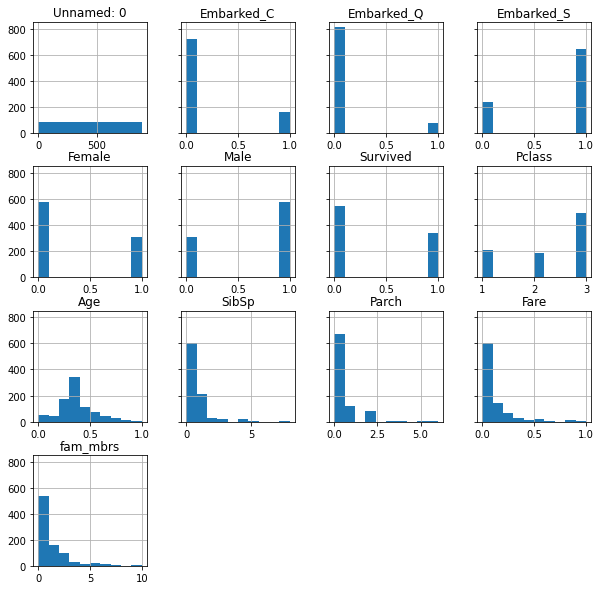

In [43]:
df.hist(figsize=(10,10), sharey=True)
plt.show()

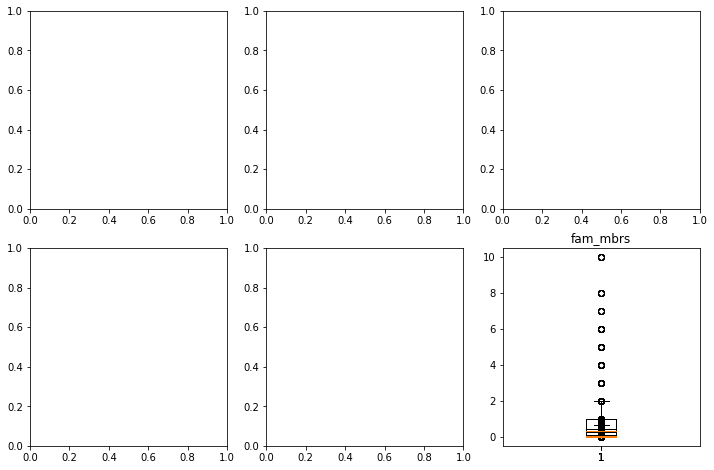

In [65]:
fig,ax = plt.subplots(2,3,figsize=(12,8))

ax[0,0] = plt.boxplot(df[['Age']])
plt.title("Age")

ax[1,1] = plt.boxplot(df[['SibSp']])
plt.title("SibSp")

plt.boxplot(df[['Parch']])
plt.title("Parch")

plt.boxplot(df[['Fare']])
plt.title("Fare")

plt.boxplot(df[['fam_mbrs']])
plt.title("fam_mbrs")

plt.show()

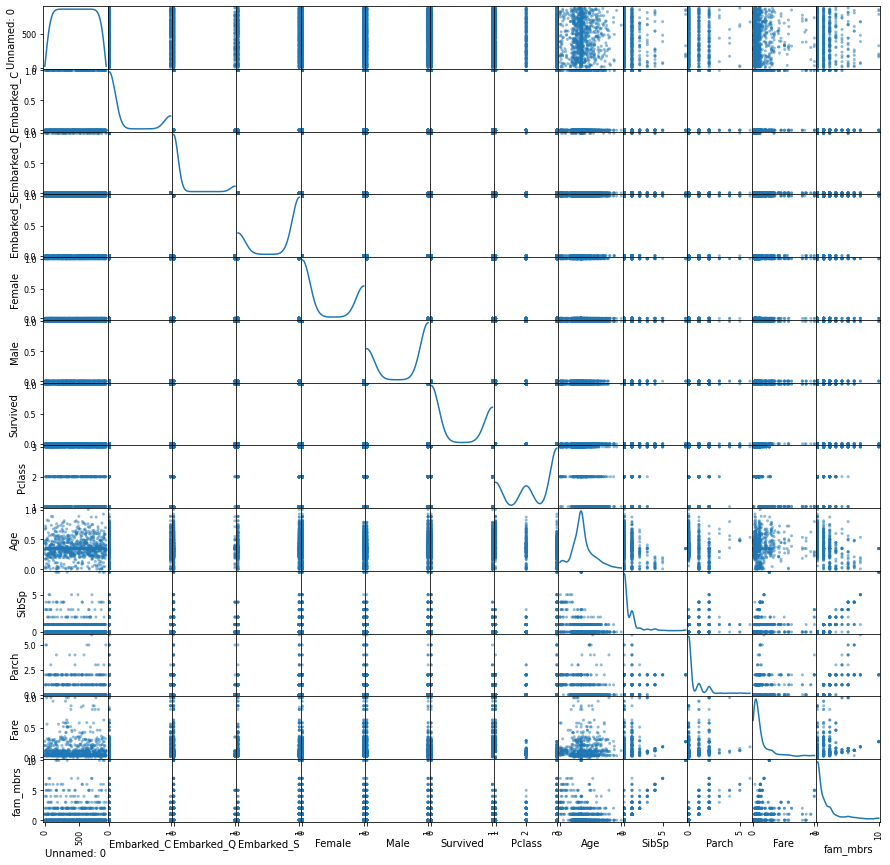

In [21]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(15,15))
plt.show()

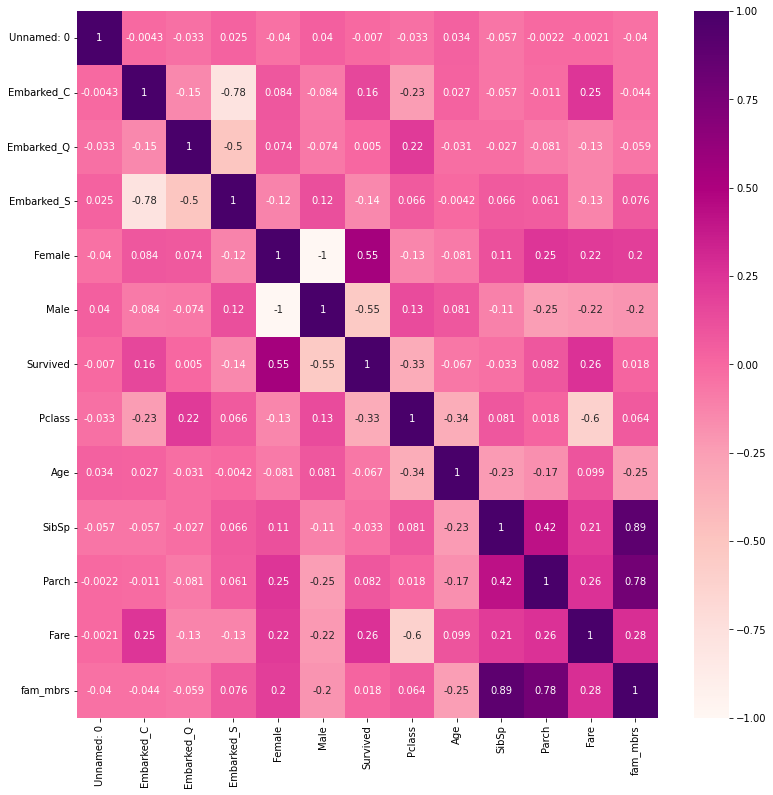

In [40]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(),annot=True, cmap="RdPu", ax=ax)
plt.show()

## Forest tree aplication 

In [ ]:
from